In [88]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

from sklearn.cluster import DBSCAN
from scipy.optimize import least_squares

In [89]:
# 拟合圆的函数
def fit_circle(x, y):
	"""拟合圆并计算曲率半径"""
	def residuals(params):
		x0, y0, R = params
		return np.sqrt((x - x0)**2 + (y - y0)**2) - R

	# 初始猜测值（圆心在路径中心附近，半径取平均距离）
	x0_guess = np.mean(x)
	y0_guess = np.mean(y)
	R_guess = np.mean(np.sqrt((x - x0_guess)**2 + (y - y0_guess)**2))
	
	# 使用最小二乘法拟合圆
	result = least_squares(residuals, [x0_guess, y0_guess, R_guess])
	 # 拟合圆的圆心坐标和半径
	x0, y0, radius = result.x
	
	# 计算每个点的角度（相对于圆心）
	angles = np.arctan2(y - y0, x - x0)
	
	# 计算角度差（弧长）
	angle_diff = np.diff(angles)  # 计算连续点之间的角度差
	arc_length = np.sum(np.abs(angle_diff)) * radius  # 弧长 = 半径 * 角度差之和
	return radius, arc_length  # 返回曲率半径和弧长

# 计算曲率、运动时间和夹角的函数
def calculate_curvature_and_angles(head_points, tail_points, timestamps):
	# 朝向方向
	head_dirs = head_points - tail_points
	positions = (head_points + tail_points)/2
	
	# 计算每50个连续点的运动曲率半径、时间、夹角
	window_size = 200
	window_interval = 50
	num_windows = (len(head_points)-window_size-1) // window_interval
	curvatures = []
	omegas = []
	angles = []

	for i in range(num_windows):
		start_idx = i * window_interval
		end_idx = i * window_interval + window_size

		# 获取当前窗口的位置数据
		x = positions[start_idx:end_idx, 0]
		y = positions[start_idx:end_idx, 1]
		
		# 拟合曲率半径和弧长
		radius, arc_length = fit_circle(x, y)
		curvatures.append(radius)

		# 计算角速度（omega），即弧长除以半径和时间差
		omega = arc_length / radius / (timestamps[end_idx-1] - timestamps[start_idx])
		omegas.append(omega)

		# 计算夹角：朝向方向和切线方向的夹角
		# 计算路径切向方向：相邻两点之间的方向
		tangent_dirs = positions[start_idx + 1:end_idx + 1] - positions[start_idx:end_idx]  # 相邻点的差值
		tangent_angles = np.arctan2(tangent_dirs[:, 1], tangent_dirs[:, 0])  # 计算切线方向的角度
		
		# 计算朝向方向的角度
		head_angles = np.arctan2(head_dirs[start_idx:end_idx, 1], head_dirs[start_idx:end_idx, 0])  # 头部方向角度
		
		# 计算夹角：朝向方向和路径切线的夹角
		angle_differences = np.abs(tangent_angles - head_angles)  # 计算角度差
		angle_differences = np.minimum(angle_differences, 2 * np.pi - angle_differences)  # 夹角是小于180度的

		# 计算平均夹角
		angles.append(np.mean(angle_differences))

	# 计算窗口内的平均值
	avg_curvatures=np.mean(curvatures)
	avg_omegas=np.mean(omegas)
	avg_angles=np.mean(angles)

	# 计算窗口内的方差
	var_curvatures=np.var(curvatures)
	var_omegas=np.var(omegas)
	var_angles= np.var(angles)

	return avg_curvatures, avg_omegas, avg_angles, var_curvatures, var_omegas, var_angles, curvatures, omegas, angles

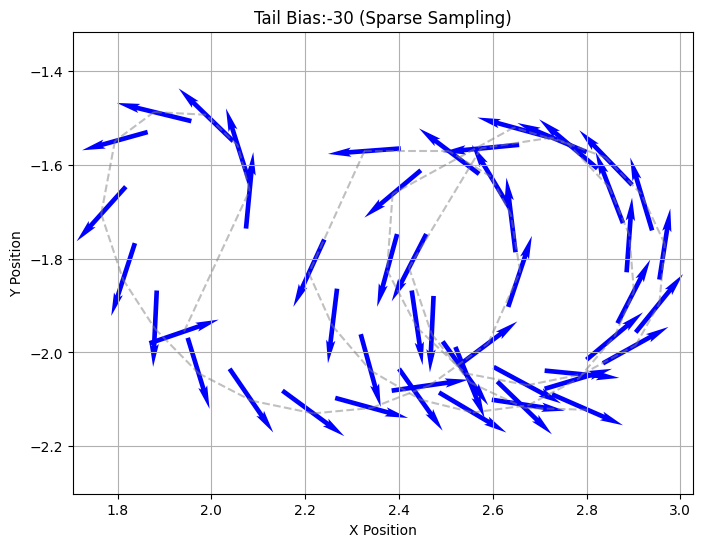

Average Curvature: 0.30425435557731184
Average omegas: 0.3628735193020456
Average Angles: 0.6288249808134672
Curvature Variance: 0.005159880551522006
omegas Variance: 0.028423352651544814
Angle Variance: 0.006332989328770307


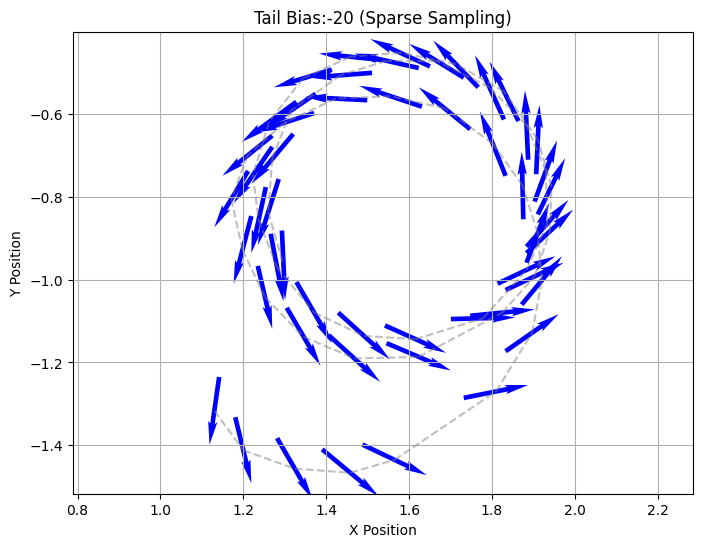

Average Curvature: 0.3785722372719333
Average omegas: 0.28312378944206473
Average Angles: 0.6702497767331718
Curvature Variance: 0.002536368363054831
omegas Variance: 0.035377643236331587
Angle Variance: 0.0033269470061777578


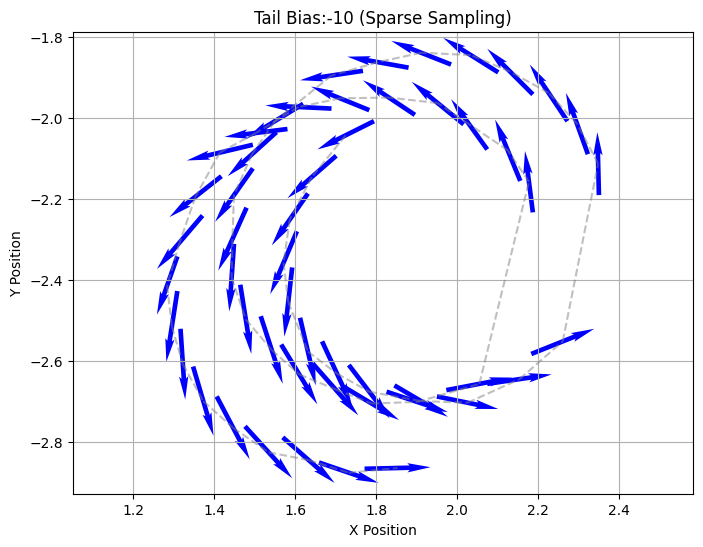

Average Curvature: 0.43105037756022635
Average omegas: 0.35704621696011624
Average Angles: 0.5944617897587542
Curvature Variance: 0.002023747641933587
omegas Variance: 0.046023329937326996
Angle Variance: 0.0020340043692623796


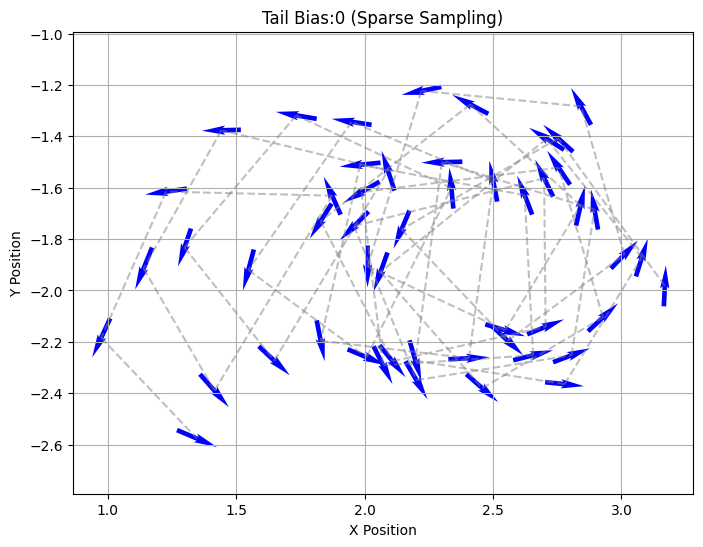

Average Curvature: 0.4937512817332523
Average omegas: 0.29079566466209705
Average Angles: 0.5795411180199951
Curvature Variance: 0.002806636416673636
omegas Variance: 0.05858930869312671
Angle Variance: 0.0030429818303741537


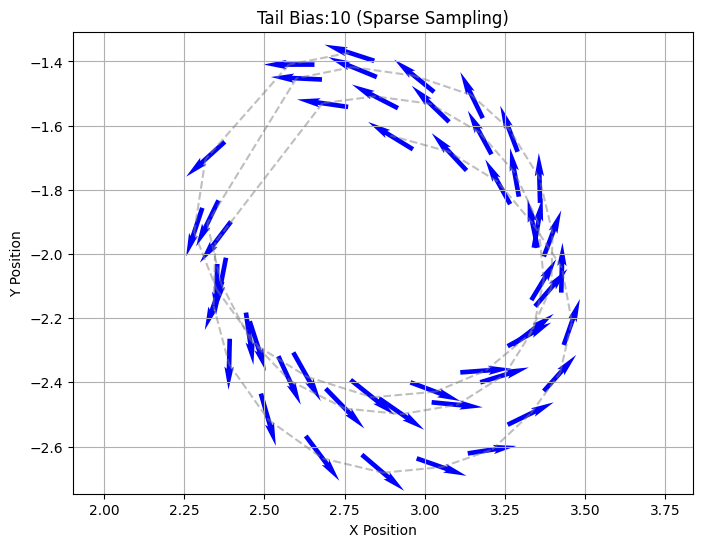

Average Curvature: 0.538182641941869
Average omegas: 0.22603332218018649
Average Angles: 0.618400906631788
Curvature Variance: 0.0022549641719180353
omegas Variance: 0.023800066267696027
Angle Variance: 0.0015755500703054186


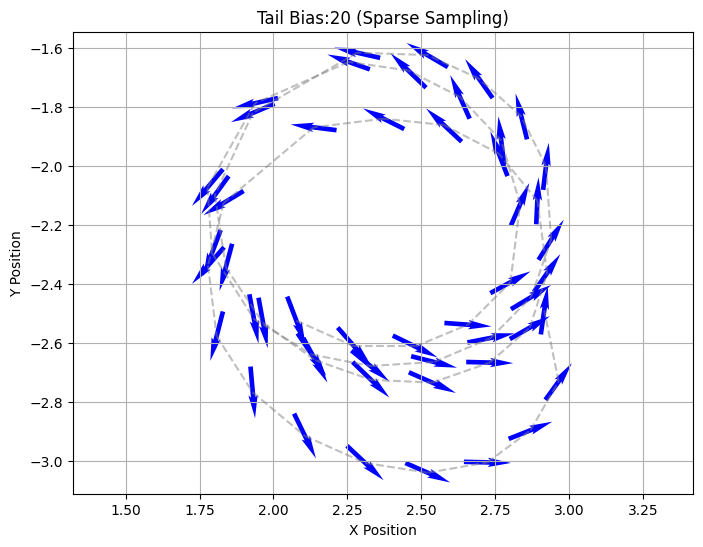

Average Curvature: 0.562348786577327
Average omegas: 0.21544730302385565
Average Angles: 0.6324930755584162
Curvature Variance: 0.0068363904121276015
omegas Variance: 0.02704947057891613
Angle Variance: 0.0023350908592268847


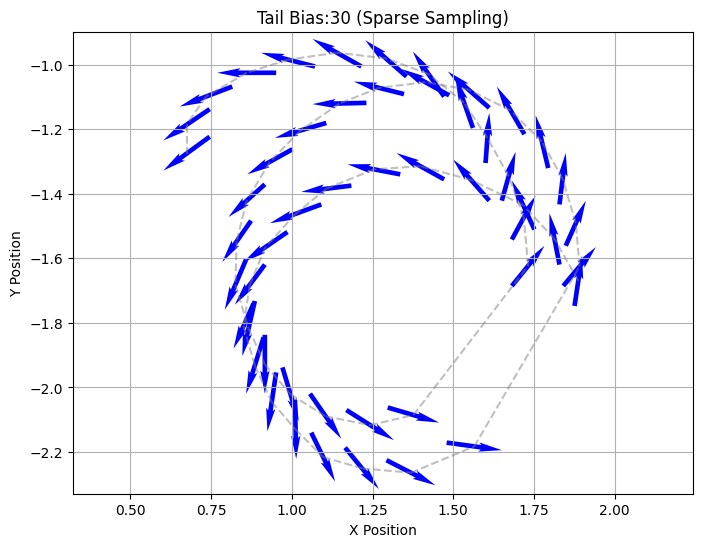

Average Curvature: 0.535854385090373
Average omegas: 0.25051525405699027
Average Angles: 0.726553972960064
Curvature Variance: 0.003111431390407973
omegas Variance: 0.04073149295301124
Angle Variance: 0.003340964088732195


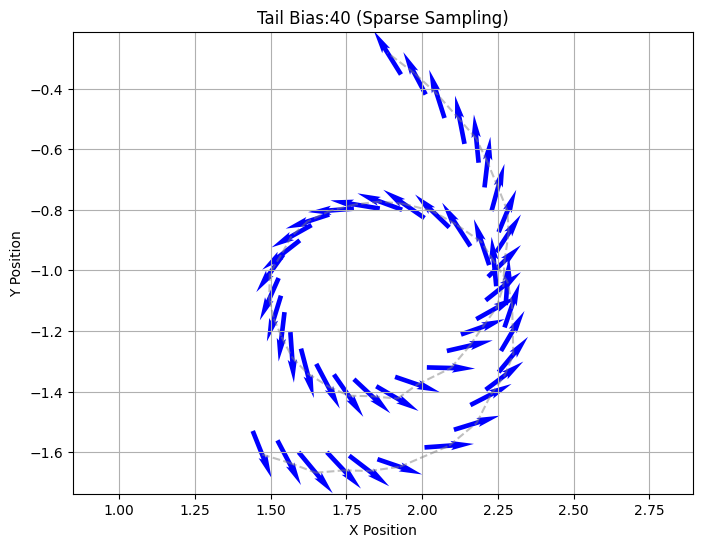

Average Curvature: 0.4329239521256223
Average omegas: 0.21205046549598253
Average Angles: 0.7039616913184429
Curvature Variance: 0.006891536371375419
omegas Variance: 0.02808746596060744
Angle Variance: 0.007179267382916905


In [134]:
# 设置文件夹路径
folder_path = "D:\work\科研项目\snippet\BacksteppingMethod\dynamic_fitting\data"#"./data"

# 使用glob获取所有csv文件路径
tail_biases = [-30, -20, -10, 0, 10, 20, 30, 40]
coeffcient_x = []
coeffcient_y = []

controll_params = [] #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]
avg_controll_params = []
for tail_bias in tail_biases:
	csv_file = glob.glob(folder_path + "/Fpec_1-Bias_" + str(tail_bias) + ".csv")
	df = pd.read_csv(csv_file[0], header=None, names=['timestamp', 'state0','state1','state2', 'head_x', 'head_y', 'tail_x', 'tail_y'])
	df = df[((df['head_x'].diff().abs()>=1) |
					(df['head_y'].diff().abs()>=1)) & 
					((df['tail_x'].diff().abs()>=1) |
					(df['tail_y'].diff().abs()>=1))
					]
	df['head_x'] = df['head_x'] / 515 * 2
	df['head_y'] = -df['head_y'] / 515 * 2
	df['tail_x'] = df['tail_x'] / 515 * 2
	df['tail_y'] = -df['tail_y'] / 515 * 2
	df = df.reset_index(drop=True)

	# 示例路径点数据（二维点集，包含噪点）
	path_points_x = np.array(df['tail_x'])
	path_points_y = np.array(df['tail_y'])
	tail_points = np.column_stack((path_points_x, path_points_y))
	path_points_x = np.array(df['head_x'])
	path_points_y = np.array(df['head_y'])
	head_points = np.column_stack((path_points_x, path_points_y))
	timestamps = np.array(df['timestamp'])
	robot_points = (head_points + tail_points)/2
	# 绘制机器人的路径和方向（稀疏采样）
	fig, ax = plt.subplots(figsize=(8, 6))

	# 设置稀疏采样间隔
	sample_interval = int(len(timestamps)/50)  # 每隔50个点画一个箭头

	# 遍历采样后的点
	for i in range(0, len(head_points), sample_interval):
		head = head_points[i]
		tail = tail_points[i]
		
		# 计算机器人的朝向向量
		direction = head - tail
		pos = (head + tail)/2	
		# 画出机器人的位置（箭头的起点）
		ax.quiver(tail[0], tail[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, color='blue', headwidth=2)
		
		# 画出路径
		if i > 0:
			prev_pos = robot_points[i - sample_interval]
			ax.plot([prev_pos[0], pos[0]], [prev_pos[1], pos[1]], color='gray', linestyle='--', alpha=0.5)

	# 设置图形参数
	ax.set_aspect('equal', 'box')
	ax.set_xlabel('X Position')
	ax.set_ylabel('Y Position')
	plt.axis('equal')
	plt.grid(True)
	plt.title("Tail Bias:"+ str(tail_bias)+" (Sparse Sampling)")
	plt.show()

	# 调用函数并打印结果
	avg_curvatures, avg_omegas, avg_angles, var_curvatures, var_omegas, var_angles, curvatures, omegas, angles = calculate_curvature_and_angles(head_points, tail_points, timestamps)
	# 输出结果
	print("Average Curvature:", avg_curvatures)
	print("Average omegas:", avg_omegas)
	print("Average Angles:", avg_angles)
	print("Curvature Variance:", var_curvatures)
	print("omegas Variance:", var_omegas)
	print("Angle Variance:", var_angles)

	#储存运动参数
	for i in range(len(curvatures)):
		u = omegas[i] * curvatures[i] * np.cos(angles[i])
		v = omegas[i] * curvatures[i] * np.sin(angles[i])
		controll_params.append([0, 1, tail_bias*np.pi/180, u, v, omegas[i]]) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]

	#储存运动参数
	u = avg_omegas * avg_curvatures * np.cos(avg_angles)
	v = avg_omegas * avg_curvatures * np.sin(avg_angles)
	avg_controll_params.append([0, 1, tail_bias*np.pi/180, u, v, avg_omegas])

	coeffcient_x.append(1.25*2/1000/(u**2))
	coeffcient_y.append(0.5*2/1000/(v**2))

In [135]:
avg_controll_params

[[0,
  1,
  -0.5235987755982988,
  0.08928733043751187,
  0.0649401575780123,
  0.3628735193020456],
 [0,
  1,
  -0.3490658503988659,
  0.08399557834621658,
  0.06658000303977299,
  0.28312378944206473],
 [0,
  1,
  -0.17453292519943295,
  0.12750252765696202,
  0.08619643684622147,
  0.35704621696011624],
 [0, 1, 0.0, 0.12013601448404385, 0.07863055810842626, 0.29079566466209705],
 [0,
  1,
  0.17453292519943295,
  0.09911894331342569,
  0.07052289627017151,
  0.22603332218018649],
 [0,
  1,
  0.3490658503988659,
  0.09771955195709285,
  0.0716225787587799,
  0.21544730302385565],
 [0,
  1,
  0.5235987755982988,
  0.10033988138303844,
  0.0891751342417794,
  0.25051525405699027],
 [0,
  1,
  0.6981317007977318,
  0.06997898659946032,
  0.059417996033350594,
  0.21205046549598253]]

In [148]:
# 根据运动数据生成拟合的系数矩阵
# A_u = F_pecx, Cd_pecx, Cd_b0x, Cd_b1x, Cd_b2x, Cd_b1y, Cd_b2y, Cd_pecy, Cd_b0y

def F_pec_fun(control_params,  coefs):
	k = 1000 * 0.5
	"""动力学模型，模拟位置与速度的关系
	tail_vel: [ [u,v], [u,v] ]
	tail_acc: [ [ax, ay], [ax, ay]]
	"""    
	[mu_l, mu_r, tail_angle,  u, v, omega] = control_params
	[Cd_pecx, Cd_b0x, Cd_b1x, Cd_b2x, Cd_b1y, Cd_b2y] = coefs
	F_pecx = 17.744*v*omega + k * (mu_l+mu_r) * u**2 * Cd_pecx +\
			k * u**2 * Cd_b0x +\
			k * (np.cos(tail_angle)**3*u**2 + 2*np.cos(tail_angle)**2*np.sin(tail_angle)*u*v + np.sin(tail_angle)**2*np.cos(tail_angle)*v**2)* Cd_b1x +\
		   -k * (np.sin(tail_angle)**3*u**2 - 2*np.sin(tail_angle)**2*np.cos(tail_angle)*u*v + np.cos(tail_angle)**2*np.sin(tail_angle)*v**2)* Cd_b1y +\
			k * (np.cos(2*tail_angle)**3*u**2 + 2*np.cos(2*tail_angle)**2*np.sin(2*tail_angle)*u*v + np.sin(2*tail_angle)**2*np.cos(2*tail_angle)*v**2)* Cd_b2x +\
		   -k * (np.sin(2*tail_angle)**3*u**2 - 2*np.sin(2*tail_angle)**2*np.cos(2*tail_angle)*u*v + np.cos(2*tail_angle)**2*np.sin(2*tail_angle)*v**2)* Cd_b2y 
	
	gradient = np.array([
		  k * (mu_l+mu_r) * u**2,
		  k * u**2,
		  k * (np.cos(tail_angle)**3*u**2 + 2*np.cos(tail_angle)**2*np.sin(tail_angle)*u*v + np.sin(tail_angle)**2*np.cos(tail_angle)*v**2),
		  -k * (np.sin(tail_angle)**3*u**2 - 2*np.sin(tail_angle)**2*np.cos(tail_angle)*u*v + np.cos(tail_angle)**2*np.sin(tail_angle)*v**2),
		  k * (np.cos(2*tail_angle)**3*u**2 + 2*np.cos(2*tail_angle)**2*np.sin(2*tail_angle)*u*v + np.sin(2*tail_angle)**2*np.cos(2*tail_angle)*v**2),
		  -k * (np.sin(2*tail_angle)**3*u**2 - 2*np.sin(2*tail_angle)**2*np.cos(2*tail_angle)*u*v + np.cos(2*tail_angle)**2*np.sin(2*tail_angle)*v**2)
	])
	return F_pecx, gradient

# 梯度下降优化
def gradient_descent(control_params_data, F_pec_data, coefs_initial, learning_rate=0.01, max_iters=1000, tol=1e-6):
	coefs = np.array(coefs_initial, dtype=float)  # 转换为浮点数数组
	F_pec_history = []  # 记录每次迭代的F_pec值，用于绘图

	for i in range(max_iters):
		gradients = np.zeros_like(coefs)
		total_loss = 0

		# 计算每个数据点的梯度并累加
		for j in range(len(control_params_data)):
			control_params = control_params_data[j]
			target_F_pec = F_pec_data[j]
			# 计算当前F_pec
			F_pec, grad = F_pec_fun(control_params, coefs)
			gradients += 2*( F_pec-target_F_pec )*grad
			# print(gradients)
			# 计算当前损失
			total_loss += (F_pec - target_F_pec) ** 2
		
		# 平均梯度
		gradients /= len(control_params_data)
		# print(gradients)
		# 更新coefs
		coefs = coefs - learning_rate * gradients

		# 记录F_pec的总损失
		F_pec_history.append(total_loss)
		
		# 检查收敛性
		if total_loss < tol:
			print(f"Converged in {i+1} iterations.")
			break
		print(i,":",total_loss/len(control_params_data), gradients)

	return coefs, F_pec_history


print(len(controll_params))

319


0 : 1.8273325112253267 [13.71478297 13.71478297 13.08446847  1.07184546 10.65593147  2.84418567]
1 : 1.2993528193036794 [11.34032018 11.34032018 10.77241929  0.87163929  8.89068528  2.3922839 ]
2 : 0.9392204166717018 [9.37919385 9.37919385 8.8637886  0.70576558 7.43367353 2.01786651]
3 : 0.6935734705416958 [7.75943125 7.75943125 7.2883217  0.56825044 6.23121899 1.70745281]
4 : 0.5260158200794967 [6.42159221 6.42159221 5.98799735 0.45416019 5.2389913  1.44990934]
5 : 0.411722954523058 [5.31658682 5.31658682 4.91489762 0.35942018 4.42037936 1.23604117]
6 : 0.33376295304671333 [4.40387312 4.40387312 4.02944854 0.28066523 3.74514719 1.05825435]
7 : 0.28058713574044697 [3.64996871 3.64996871 3.29896725 0.21511608 3.18832384 0.91027716]
8 : 0.24431853068994788 [3.02722142 3.02722142 2.69646199 0.16047737 2.72928658 0.7869298 ]
9 : 0.2195845015101906 [2.51279412 2.51279412 2.19964115 0.1148534  2.35100378 0.68393432]
10 : 0.20272052632487142 [2.08782629 2.08782629 1.79009481 0.07667849 2.0394

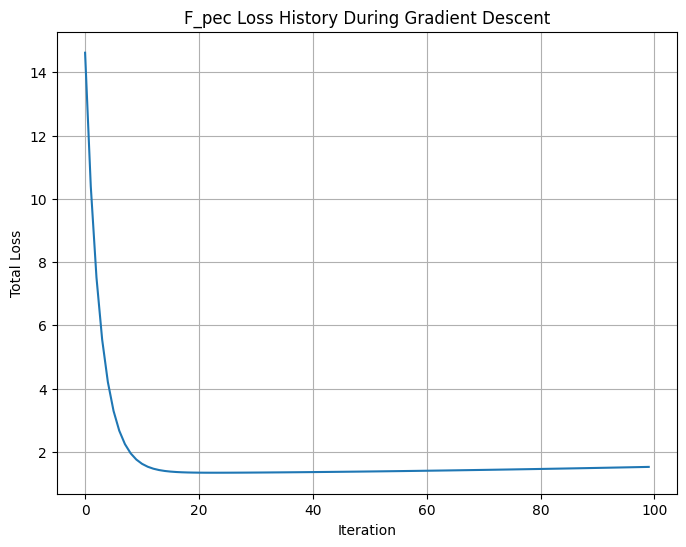

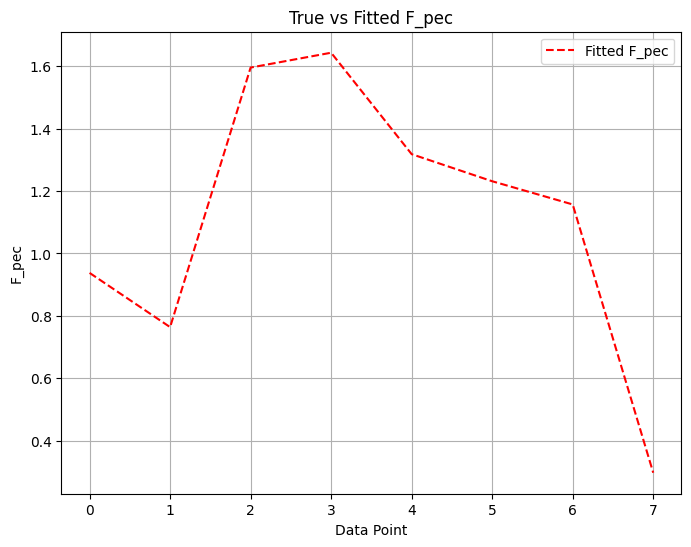

Optimized coefs: [ 0.01627778  0.01627778  0.02700222  0.11190433 -0.02898945  0.0835838 ]


In [149]:
# 初始coefs
coefs_initial = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
F_pec_data = np.ones(len(avg_controll_params))*1.25  # 对应的319个F_pec值
# 使用梯度下降进行优化
optimized_coefs, F_pec_history = gradient_descent(avg_controll_params, F_pec_data, coefs_initial, max_iters=100, learning_rate=0.001)

# 可视化F_pec的收敛过程
plt.figure(figsize=(8, 6))
plt.plot(F_pec_history)
plt.title("F_pec Loss History During Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Total Loss")
plt.grid(True)
plt.show()

# 使用优化后的coefs计算拟合的F_pec
fitted_F_pec = []
for i in range(len(F_pec_data)):
    f, _ = F_pec_fun(avg_controll_params[i], optimized_coefs)
    fitted_F_pec.append(f)
fitted_F_pec = np.array(fitted_F_pec)               

# 可视化真实F_pec和拟合的F_pec对比
plt.figure(figsize=(8, 6))
# plt.plot(F_pec_data, label='True F_pec', color='b')
plt.plot(fitted_F_pec, label='Fitted F_pec', color='r', linestyle='--')
plt.title("True vs Fitted F_pec")
plt.xlabel("Data Point")
plt.ylabel("F_pec")
plt.legend()
plt.grid(True)
plt.show()

# 打印优化后的系数
print("Optimized coefs:", optimized_coefs)


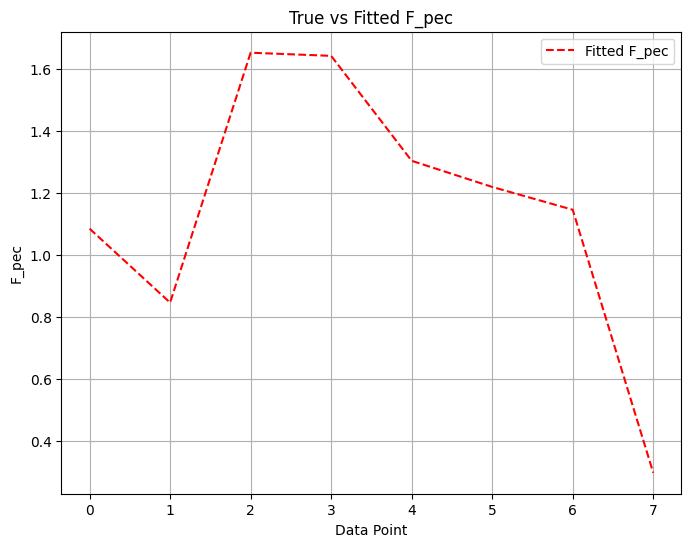

Optimized coefs: [ 0.01627778  0.01627778  0.02700222  0.11190433 -0.02898945  0.0835838 ]


In [150]:
# 使用优化后的coefs计算拟合的F_pec
fitted_F_pec = []
for i in range(len(F_pec_data)):
    f, _ = F_pec_fun(avg_controll_params[i], [ 0.01627778 , 0.01627778 , 0.02700222 , 0.11190433, 0.02898945 , 0.0835838 ])
    fitted_F_pec.append(f)
fitted_F_pec = np.array(fitted_F_pec)               

# 可视化真实F_pec和拟合的F_pec对比
plt.figure(figsize=(8, 6))
# plt.plot(F_pec_data, label='True F_pec', color='b')
plt.plot(fitted_F_pec, label='Fitted F_pec', color='r', linestyle='--')
plt.title("True vs Fitted F_pec")
plt.xlabel("Data Point")
plt.ylabel("F_pec")
plt.legend()
plt.grid(True)
plt.show()

# 打印优化后的系数
print("Optimized coefs:", optimized_coefs)